In [135]:
# MODEL COMPARISON!

In [136]:
# MODEL COMPARISON

env = 'colab'  # 'colab' only
assert env == 'colab'

# using_gpu = False  # True or False

# saving_metrics_report = True
# saving_train_times = True
# saving_histories = True

# test_percentage = 0.99

git_download_path = 'https://raw.githubusercontent.com/PashaIanko/Covid19Classifier/model_comparison/'
final_models_path = '/content/drive/MyDrive/UNIPD/HDA/Project/SavedModels/SuccessfulTrialsNoCLAHE/'
# Number of trial for this day (-> directory/24-01-22/trial-{n_trial}/ -- example of directories)

In [137]:
names = [
         # Names of final, fully-fit models for comparison
         'CNN',
         'Dropout',
         'AlexNet'
]

# date_ = '2022-01-31'
# n_trial = 1

# Packages & functions

In [138]:
# %%capture
def download_files(url_dict):
    for file, url in url_dict.items():
        print(f'Downloading {file}')
        !wget -O {file} {url} {file}


if env == 'colab':
    from google.colab import drive
    drive.mount('/content/drive')

    
    files = [
            'DataProperties.py',
            # 'DatasetParameters.py',
            # 'Preprocessing.py',
            # 'PreprocessingParameters.py',
            
            # 'Model.py',
            # 'BNModel.py',
            # 'CNNModel.py',
            # 'VGG19Model.py',
            # 'VGG16Model.py',
            # 'AlexNetModel.py',
            # 'DropoutModel.py',
            # 'InceptionModel.py',
            # 'ResNetModel.py',

            'Utils.py',
            'ModelUtils.py',
            # 'TimeCallBack.py'
    ]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
%%capture
if env == 'colab':
    url_dict = {file: git_download_path + file for file in files}
    download_files(url_dict)

In [140]:
# import os
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt

In [141]:
from os.path import isdir
from os.path import isfile
from os import listdir
import pandas as pd
import os
# import numpy as np

# # Plotting
# import seaborn as sns

# # Utils
import importlib
# from os.path import isdir
# from datetime import date
# import pandas as pd

# # Dataset
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [142]:
# import DataProperties 
# import PreprocessingParameters 
# import Preprocessing
# import DatasetParameters
import Utils
import DataProperties
# import CNNModel
# import BNModel
# import ResNetModel
# import DropoutModel
# import InceptionModel
# import AlexNetModel
# import VGG19Model
# import VGG16Model
# import Model
import ModelUtils

# import TimeCallBack

def reload_all(modules_list):
    for module in modules_list:
        importlib.reload(module)

reload_all(
    [
        DataProperties,
        # PreprocessingParameters,
        # DatasetParameters,
        Utils,
        # Preprocessing,

        # Model,
        # CNNModel,
        # BNModel,
        # DropoutModel,
        
        # VGG16Model,
        # ResNetModel,
        # InceptionModel,
        # ModelUtils,
        # TimeCallBack,
        # VGG19Model,
        # AlexNetModel
    ]
)

# from DataProperties import DataProperties
# from PreprocessingParameters import PreprocessingParameters
# from DatasetParameters import DatasetParameters
from Utils import *
# from Preprocessing import *
# from CNNModel import CNNModel
# from BNModel import BNModel
# from DropoutModel import DropoutModel
# from VGG19Model import VGG19Model
# from ResNetModel import ResNetModel
# from InceptionModel import InceptionModel
# from ModelUtils import ModelUtils
# from TimeCallBack import TimeCallBack
# from AlexNetModel import AlexNetModel
# from VGG16Model import VGG16Model

In [143]:
# DataProps = DataProperties(
#     environment = env,
#     n_trial = n_trial
# )

# Download necessary data

In [144]:
assert isdir(final_models_path) == True
available_models = listdir(final_models_path)

for name in names:
    assert name in available_models

In [145]:
def load_train_times(model_names, base_dir):
    res = {name: None for name in model_names}
    
    for name in model_names:
        model_dir = f'{base_dir}{name}/'
        assert(isdir(model_dir))

        file_path = f'{model_dir}training_time.csv'
        res[name] = pd.read_csv(file_path)

    return res

train_time_dict = load_train_times(names, base_dir = final_models_path)

In [146]:
def load_test_metrics(model_names, base_dir):
    
    res = {name: None for name in model_names}
    for name in model_names:
        model_dir = f'{base_dir}{name}/'
        assert isdir(model_dir)

        file_path = f'{model_dir}test_metrics_res.csv'
        res[name] = pd.read_csv(file_path)
    return res

test_metrics_dict = load_test_metrics(
    model_names = names,
    base_dir = final_models_path
)

In [147]:
def load_histories(model_names, base_dir):
    res = {name: None for name in model_names}

    for name in names:
        history_dir = f'{base_dir}{name}/Histories/'
        assert isdir(history_dir) == True

        file_path = f'{history_dir}{name}_history.csv'
        assert isfile(file_path)

        res[name] = pd.read_csv(file_path)
    
    return res


histories_dict = load_histories(
    model_names = names,
    base_dir = final_models_path
)

# Summary of learning curves

In [148]:
histories_dict['CNN'].head(), histories_dict['Dropout'].head()

(   Unnamed: 0       loss       acc   val_loss   val_acc
 0           0  59.034439  0.490602  30.145298  0.607143
 1           1  22.146191  0.644473  17.057980  0.687500
 2           2  14.311726  0.676649  11.952933  0.659226
 3           3  10.302170  0.668684   8.773252  0.633929
 4           4   7.562735  0.672507   6.514511  0.665179,
    Unnamed: 0      loss       acc  val_loss   val_acc
 0           0  0.894235  0.573431  0.706818  0.633929
 1           1  0.654191  0.716152  0.619452  0.760417
 2           2  0.644341  0.729850  0.673086  0.657738
 3           3  0.585047  0.757566  0.614610  0.739583
 4           4  0.547559  0.791335  0.650161  0.715774)

In [149]:
cnn_loss = histories_dict['CNN']['val_acc']
drop_loss = histories_dict['Dropout']['val_acc']

In [150]:
def plot_learning_curves(
    names, 
    hist_dict, 
    metrics_name, 
    figsize = (10, 10),
    title = 'PUT TITLE',
    ylabel = 'PUT LABEL',
    plot_validation = False
):

    fig, ax = plt.subplots(figsize = figsize)

    plt_params_dict = dict(
        marker = 'o',
        markersize = 7,
        markerfacecolor = 'white'
    )

    fontsize = 20  # Axis writing
    ticksize = 20  # Ticks writing
    legendsize = 19

    for name in names:
        data = hist_dict[name][metrics_name]
        ax.plot(data, **plot_params_dict)
        
        if plot_validation:
            val_data = hist_dict[name][f'val_{metrics_name}']
            ax.plot(val_data, **plot_params_dict)

    ax.tick_params(axis = 'both', labelsize = ticksize)
    ax.set_title(title, fontsize = fontsize)
    ax.set_xlabel('Epoch', fontsize = fontsize)
    ax.set_ylabel(ylabel, fontsize = fontsize)
    ax.grid()

    
    legend_names = []
    if plot_validation:
        pairs = [[name, f'{name} (val)'] for name in names]
        for p in pairs:
            legend_names.append(p[0])
            legend_names.append(p[1])
            
    else:
        legend_names = names
    ax.legend(legend_names, fontsize = legendsize)

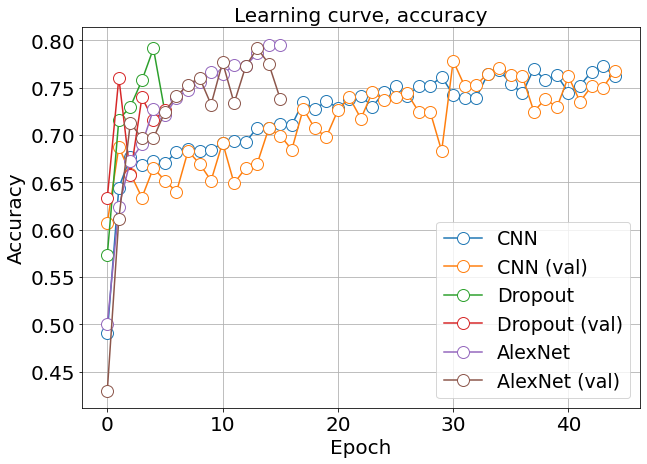

In [151]:
plot_learning_curves(
    names,
    histories_dict,
    figsize = (10, 7),
    metrics_name = 'acc',
    title = 'Learning curve, accuracy',
    ylabel = 'Accuracy',
    plot_validation = True
)

# Models evaluation

## Reload history and training time

In [ ]:
training_time_path = f'{DataProps.core_path}{date_}/trial-{n_trial}/'
evaluation_path = f'{DataProps.core_path}{date_}/trial-{n_trial}/'

In [ ]:
training_time_df = pd.read_csv(
    f'{evaluation_path}training_time.csv'
)
training_time_df = training_time_df.apply(lambda x: pd.Series(x.dropna().values)).fillna('')

In [ ]:
training_time_df.head()

,Unnamed: 0,VGG16
0,0,128.598126
1,1,256.035699
2,2,383.709220
3,3,511.234345
4,4,639.911254


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


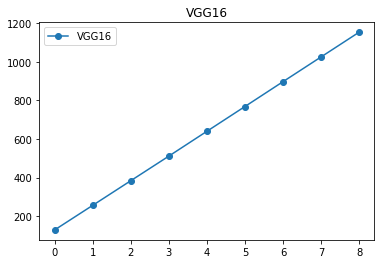

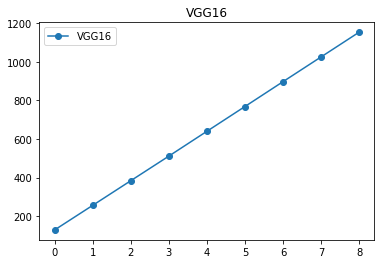

In [ ]:
def visualize_train_time(df, names):
    _, ax = plt.subplots()
    for name in names:
        values = df[name].values
        values = values[values != '']  # yes, crappy code, i dont have a lot of time yet
        ax.plot(*values, marker = 'o')
    ax.set_title(name)
    ax.legend(names)


visualize_train_time(training_time_df, names)

# For separate graphs
for name in names:
   visualize_train_time(training_time_df, [name])

## Full train time, seconds per epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


128.5981260000001 <class 'numpy.float64'>


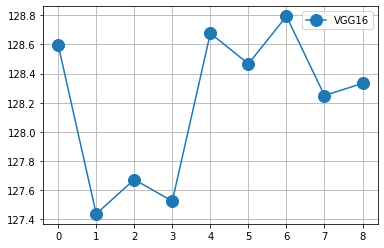

In [ ]:
def visualize_time_per_epoch(df, names):
    fig, ax = plt.subplots()
    for name in names:
        time_series = df[name].values
        time_series = time_series[time_series != '']
        time_series = time_series[0]
        deltas = [time_series[i] - time_series[i-1] for i in range(1, len(time_series))]
        deltas.insert(0, time_series[0])
        print(deltas[0], type(deltas[0]))
        ax.plot(deltas, marker = 'o', markersize = 12)
    ax.grid()
    ax.legend(names)


visualize_time_per_epoch(training_time_df, names)

## Test flow performance

In [ ]:
if using_gpu:
    print(f'Fitting with GPU')
    with tf.device(device_name):
        metrics_dict = collect_metrics(models, test_flow, test_steps)
else:
    metrics_dict = collect_metrics(models, test_flow, test_steps)

681/681 [==============================] - 430s 630ms/step - loss: 0.4739 - acc: 0.8311


In [ ]:
def normalize_col(df, colnames):
    for c in colnames:
        df[c + '_norm'] = df[c] / np.max(df[c])

test_metrics_df = pd.DataFrame(metrics_dict).transpose()

normalize_col(
    test_metrics_df,
    [
        'data_eval_time_sec',
        'tr_params',
        'test_loss^(-1)'
    ]
)

In [ ]:
test_metrics_df.head()

,F1,data_eval_time_sec,data_size,precision,recall,test_accuracy,test_loss^(-1),tr_params,data_eval_time_sec_norm,tr_params_norm,test_loss^(-1)_norm
VGG16,0.829111,442.816964,681.0,0.852415,0.831131,0.831131,0.473869,134272835.0,1.0,1.0,1.0


In [ ]:
if saving_metrics_report:
    print(f'Saving metrics to {evaluation_path}')
    test_metrics_df.to_csv(evaluation_path + 'test_metrics_res.csv')

Saving metrics to /content/drive/MyDrive/UNIPD/HDA/Project/SavedModels/2022-01-31/trial-1/


<Figure size 1080x1080 with 0 Axes>

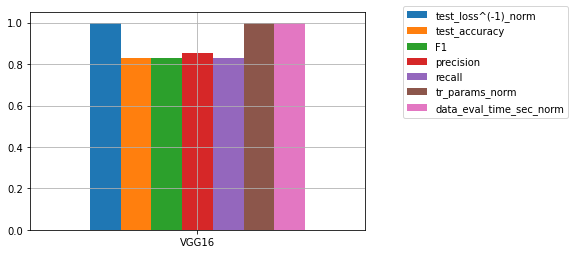

In [ ]:
metrics_to_show = [
                   'test_loss^(-1)_norm',
                   'test_accuracy',
                   'F1',
                   'precision',
                   'recall',
                   
                   'tr_params_norm',
                   'data_eval_time_sec_norm'
]

plt.figure(figsize = (15, 15))
ax = test_metrics_df.loc[:, metrics_to_show].plot.bar(
    rot = 0,
    width = 0.9
)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid()

## Confusion matrices

In [ ]:
for m_name, model in models.items():
    test_flow.reset()
    plot_confusion_matrix(
        Y_true = test_flow.classes, 
        Y_pred = model.flow_predict(
            test_flow,
            test_steps
        ),
        class_indices = test_flow.class_indices
    )

## Learning curves

In [ ]:
histories_path = f'{evaluation_path}/Histories/'
histories_dfs = {}

In [ ]:
for name in names:
    file_path = f'{histories_path}{name}_history.csv'
    df = pd.read_csv(file_path)
    histories_dfs[name] = df

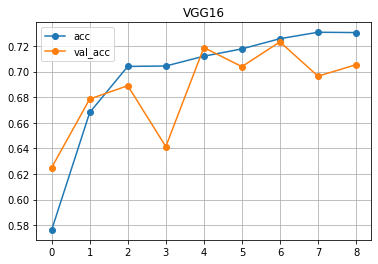

In [ ]:
def plot_learning_curves(histories_dict):
    for name, df in histories_dict.items():
        _, ax = plt.subplots()

        acc = df['acc']
        val_acc = df['val_acc']
        ax.plot(acc, marker = 'o')
        ax.plot(val_acc, marker = 'o')
        ax.set_title(name)
        ax.legend(['acc', 'val_acc'])
        plt.grid()

plot_learning_curves(histories_dfs)

## Layers interpretation

In [ ]:
img_n = 7

In [ ]:
if 'CNN' in names:
    visualize_kernel_work(
        model = models['CNN'].model, 
        n_layer = 0, 
        n_kernel = 0, 
        
        image = test_flow[img_n][0][0],
        label = test_flow[img_n][1][0],  # 10th image 
        n_color_channels = PreprocessingParameters.n_color_channels[0]
    )

In [ ]:
if 'CNN' in names:
    visualize_kernel_work(
        model = models['CNN'].model, 
        n_layer = 4,
        n_kernel = 0,

        image = test_flow[img_n][0][0],
        label = test_flow[img_n][1][0],
        n_color_channels = PreprocessingParameters.n_color_channels[0]
    )